# Proportion Tests

## Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, chisquare
from statsmodels.stats.proportion import proportions_ztest
import pingouin

In [22]:
late_shipments = pd.read_feather('late_shipments.feather').rename(columns={'freight_cost_groups': 'freight_cost_group'})

In [15]:
ns = pd.Series([545, 455], index=pd.MultiIndex.from_tuples([('expensive', ), ('reasonable', )], names=['freight_cost_group']))

In [11]:
p_hats = pd.Series([0.083, 0.035], index=pd.MultiIndex.from_tuples(
    [
        ('expensive', 'Yes'),
        ('reasonable', 'Yes')
    ], names=['freight_cost_group', 'late']))

## One-sample proportion tests

### Test for single proportions

In [16]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


## Two-sample proportion tests

### Test of two proportions

In [17]:
# Calculate the pooled estimate of the population proportion
p_hat = (ns['expensive'] * p_hats['expensive'] + ns['reasonable'] * p_hats['reasonable']) / (ns['expensive'] + ns['reasonable'])

# Print the result
print(p_hat)

late
Yes    0.06116
dtype: float64


In [18]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = (p_hat_times_not_p_hat / ns['expensive']) + (p_hat_times_not_p_hat / ns['reasonable'])

# Calculate the standard error
std_error = p_hat_times_not_p_hat_over_ns ** 0.5

# Print the result
print(std_error)

late
Yes    0.015217
dtype: float64


In [19]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats['expensive'] - p_hats['reasonable'])/std_error

# Print z_score
print(z_score)

late
Yes    3.154392
dtype: float64


In [20]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

[0.00080416]


### proportions_ztest() for two samples

In [23]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_group')['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_group  late
expensive           No      489
                    Yes      42
reasonable          No      439
                    Yes      16
Name: count, dtype: int64


In [26]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_group")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([45 + 500, 16 + 439])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(
    count=success_counts,
    nobs=n,
    alternative='larger'
)

# Print the results
print(stat, p_value)

3.1190401865206128 0.0009072060637051224


## Chi-square test of independence

### Performing a chi-square test

In [27]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Print props
print(props)

vendor_inco_term  freight_cost_group
CIP               reasonable            0.680000
                  expensive             0.320000
DDP               expensive             0.550000
                  reasonable            0.450000
DDU               reasonable            1.000000
EXW               expensive             0.583448
                  reasonable            0.416552
FCA               reasonable            0.663636
                  expensive             0.336364
Name: proportion, dtype: float64


In [28]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

freight_cost_group  expensive  reasonable
vendor_inco_term                         
CIP                  0.320000    0.680000
DDP                  0.550000    0.450000
DDU                       NaN    1.000000
EXW                  0.583448    0.416552
FCA                  0.336364    0.663636


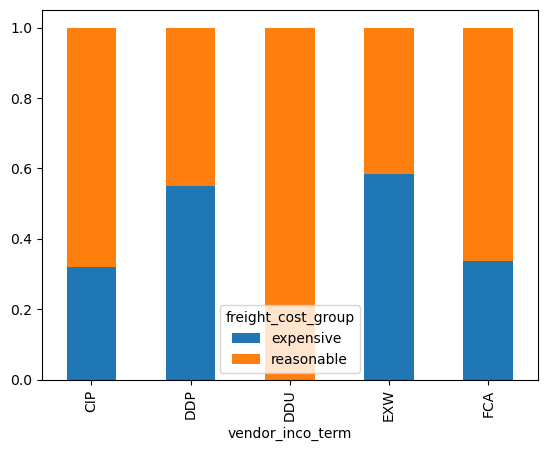

In [31]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

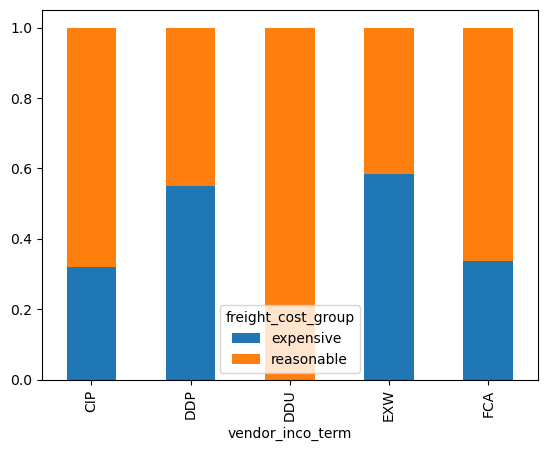

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7343: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7343: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/israel/miniconda3/envs/ds2/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7340: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [32]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_group'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(
    data=late_shipments,
    x='freight_cost_group',
    y='vendor_inco_term'
)

# Print results
print(stats[stats['test'] == 'pearson']) 

## Chi-square goodness of fit tests

### Visualizing goodness of fit

In [46]:
hypothesized = pd.DataFrame(
    {
        'vendor_inco_term': ['CIP', 'DDP', 'EXW', 'FCA'],
        'prop': [0.05, 0.10, 0.75, 0.10]
        }
)
incoterm_counts = pd.DataFrame(
    {
        'vendor_inco_term': ['CIP', 'DDP', 'EXW', 'FCA'],
        'n': [56, 100, 732, 111],
        }
)

In [33]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

1000


In [47]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized['prop'] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)

  vendor_inco_term  prop      n
0              CIP  0.05   50.0
1              DDP  0.10  100.0
2              EXW  0.75  750.0
3              FCA  0.10  100.0


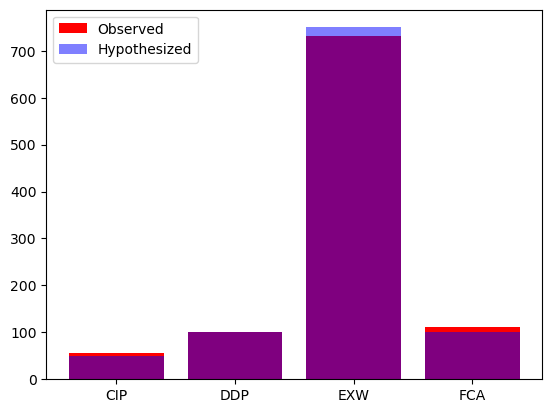

In [48]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], color="blue", alpha=0.5, label="Hypothesized")
plt.legend()
plt.show()

### Performing a goodness of fit test

In [55]:
hypothesized = pd.DataFrame({'n': [49.95, 99.90, 749.25, 99.90]})
incoterm_counts = pd.DataFrame({'n': [56, 100, 732, 111]})

In [56]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])


# Print gof_test results
print(gof_test)

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)
